<a href="https://colab.research.google.com/github/r-doz/PML2025/blob/main/./Homeworks/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1

Probabilistic Machine Learning -- Spring 2025, UniTS

### Exercise 1: KL Divergence Between Two Gaussian Distributions

Given two multivariate Gaussian distributions:

$$
p(x) = \mathcal{N}(x \mid \mu, \Sigma)
$$

$$
q(x) = \mathcal{N}(x \mid m, L)
$$

where:
- $\mu$ and $ \Sigma $ are the mean vector and covariance matrix of $ p(x) $,
- $ m $ and $ L $ are the mean vector and covariance matrix of $ q(x) $,


1. **Derive the closed-form expression** for $D_{\text{KL}}(p \parallel q)$ starting from the definition.

2. **Implement a Python function** that computes the closed-form expression of the KL divergence for two-dimensional Gaussian distributions using only **numpy** functions.

3. **Test the function** on the following concrete example where both $ p(x) $ and $q(x)$ are two-dimensional Gaussians. 

4. Implement another Python function which calculates an **approximation of $D_{\text{KL}}(p \parallel q)$ from samples** of p and q. Compare the results. 


### SOLUTION:

The KL divergence for a continuous random variable is given by
$$
\mathrm{KL}[P\,||\,Q] = \int_{\mathcal{X}} p(x) \, \ln \frac{p(x)}{q(x)} \, \mathrm{d}x
$$
which, applied to the multivariate normal distributions, yields
$$
\begin{split}
\mathrm{KL}[P\,||\,Q] &= \int_{\mathbb{R}^n} \mathcal{N}(x \mid \mu, \Sigma) \, \ln \frac{\mathcal{N}(x \mid \mu, \Sigma)}{\mathcal{N}(x \mid m, L)} \, \mathrm{d}x \\
&= \left\langle \ln \frac{\mathcal{N}(x | \mu, \Sigma)}{\mathcal{N}(x | m, L)} \right\rangle_{p(x)} \; .
\end{split}
$$
Using the probability density function of the multivariate normal distribution, this becomes:

$$
\begin{split}
\mathrm{KL}[P\,||\,Q] &= \left\langle \ln \frac{ \frac{1}{\sqrt{(2 \pi)^n |\Sigma|}} \cdot \exp \left[ -\frac{1}{2} (x-\mu)^\mathrm{T} \Sigma^{-1} (x-\mu) \right] }{ \frac{1}{\sqrt{(2 \pi)^n |L|}} \cdot \exp \left[ -\frac{1}{2} (x-m)^\mathrm{T} L^{-1} (x-m) \right] } \right\rangle_{p(x)} \\
&= \left\langle \frac{1}{2} \ln \frac{|L|}{|\Sigma|} - \frac{1}{2} (x-\mu)^\mathrm{T} \Sigma^{-1} (x-\mu) + \frac{1}{2} (x-m)^\mathrm{T} L^{-1} (x-m) \right\rangle_{p(x)} \\
&= \frac{1}{2} \left\langle \ln \frac{|L|}{|\Sigma|} - (x-\mu)^\mathrm{T} \Sigma^{-1} (x-\mu) + (x-m)^\mathrm{T} L^{-1} (x-m) \right\rangle_{p(x)} \; .
\end{split}
$$

Now, using the fact that $x= tr(x)$, if $a$ is scala, and the trace property $ tr(ABC) = tr(BCA) $ we have:

 $$
 \begin{split}
\mathrm{KL}[P\,||\,Q] &= \frac{1}{2} \left\langle \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ \Sigma^{-1} (x-\mu) (x-\mu)^\mathrm{T} \right] + \mathrm{tr}\left[ L^{-1} (x-m) (x-m)^\mathrm{T} \right] \right\rangle_{p(x)} \\
&= \frac{1}{2} \left\langle \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ \Sigma^{-1} (x-\mu) (x-\mu)^\mathrm{T} \right] + \mathrm{tr}\left[ L^{-1} \left( x x^\mathrm{T} - 2 m x^\mathrm{T} + m m^\mathrm{T} \right) \right] \right\rangle_{p(x)} \; .
\end{split}
$$

Because trace function and expected value are both linear operators, the expectation can be moved inside the trace:

$$
\begin{split}
\mathrm{KL}[P\,||\,Q] &= \frac{1}{2} \left( \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ \Sigma^{-1} \left\langle (x-\mu) (x-\mu)^\mathrm{T} \right\rangle_{p(x)} \right] + \mathrm{tr}\left[ L^{-1} \left\langle x x^\mathrm{T} - 2 m x^\mathrm{T} + m m^\mathrm{T} \right\rangle_{p(x)} \right] \right) \\
&= \frac{1}{2} \left( \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ \Sigma^{-1} \left\langle (x-\mu) (x-\mu)^\mathrm{T} \right\rangle_{p(x)} \right] + \mathrm{tr}\left[ L^{-1} \left( \left\langle x x^\mathrm{T} \right\rangle_{p(x)} - \left\langle 2 m x^\mathrm{T} \right\rangle_{p(x)} + \left\langle m m^\mathrm{T} \right\rangle_{p(x)} \right) \right] \right) \; .
\end{split}
$$

Using the expectation of a linear form for the multivariate normal distribution

$$ 
x \sim \mathcal{N}(\mu, \Sigma) \quad \Rightarrow \quad \left\langle A x \right\rangle = A \mu
$$

and the expectation of a quadratic form for the multivariate normal distribution

$$
x \sim \mathcal{N}(\mu, \Sigma) \quad \Rightarrow \quad \left\langle x^\mathrm{T} A x \right\rangle = \mu^\mathrm{T} A \mu + \mathrm{tr}(A \Sigma) \; ,
$$

the Kullback-Leibler divergence from 
(7)
 becomes:

 $$
 \begin{split}
\mathrm{KL}[P\,||\,Q] &= \frac{1}{2} \left( \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ \Sigma^{-1} \Sigma \right] + \mathrm{tr}\left[ L^{-1} \left( \Sigma + \mu \mu^\mathrm{T} - 2 m \mu^\mathrm{T} + m m^\mathrm{T} \right) \right] \right) \\
&= \frac{1}{2} \left( \ln \frac{|L|}{|\Sigma|} - \mathrm{tr}\left[ I_n \right] + \mathrm{tr}\left[ L^{-1} \Sigma \right] + \mathrm{tr}\left[ L^{-1} \left( \mu \mu^\mathrm{T} - 2 m \mu^\mathrm{T} + m m^\mathrm{T} \right) \right] \right) \\
&= \frac{1}{2} \left( \ln \frac{|L|}{|\Sigma|} - n + \mathrm{tr}\left[ L^{-1} \Sigma \right] + \mathrm{tr}\left[ \mu^\mathrm{T} L^{-1} \mu  - 2 \mu^\mathrm{T} L^{-1} m  + m^\mathrm{T} L^{-1} m \right] \right) \\
&= \frac{1}{2} \left[ \ln \frac{|L|}{|\Sigma|} - n + \mathrm{tr}\left[ L^{-1} \Sigma \right] + (m - \mu)^\mathrm{T} L^{-1} (m - \mu) \right] \; .
\end{split}
$$

Finally, rearranging the terms, we get:

$$
\mathrm{KL}[P\,||\,Q] = \frac{1}{2} \left[ (m - \mu)^\mathrm{T} L^{-1} (m - \mu) + \mathrm{tr}(L^{-1} \Sigma) - \ln \frac{|\Sigma|}{|L|} - n \right] \; .
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kl_mvn(m0, S0, m1, S1):
    # store inv diag covariance of S1 and diff between means
    N = m0.shape[0]
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0

    # kl is made of three terms
    tr_term   = np.trace(iS1 @ S0)
    det_term  = np.log(np.linalg.det(S1)/np.linalg.det(S0)) #np.sum(np.log(S1)) - np.sum(np.log(S0))
    quad_term = diff.T @ np.linalg.inv(S1) @ diff #np.sum( (diff*diff) * iS1, axis=1)
    #print(tr_term,det_term,quad_term)
    return .5 * (tr_term + det_term + quad_term - N) 

In [ ]:
np.random.seed(42)

mu_p = np.array([10, 12])  
sigma_p = np.array([[3, 0.5], [0.5, 2]]) 
mu_q = np.array([14, 10]) 
sigma_q = np.array([[2, 0.3], [0.3, 1]])  

print(kl_mvn(mu_p, sigma_p, mu_q, sigma_q)) # KL divergence from p to q

data_points = 1000

p_samples = np.random.multivariate_normal(mu_p, sigma_p, data_points)
q_samples = np.random.multivariate_normal(mu_q, sigma_q, data_points)

def kl_mvn_sample(p_samples, q_samples):
    # store inv diag covariance of S1 and diff between means
    mean_p = np.mean(p_samples, axis=0)
    mean_q = np.mean(q_samples, axis=0)
    cov_p = np.cov(p_samples, rowvar=False)
    cov_q = np.cov(q_samples, rowvar=False)
    N = mean_p.shape[0]
    icov_q = np.linalg.inv(cov_q)
    diff = mean_p - mean_q

    # kl is made of three terms
    tr_term   = np.trace(icov_q @ cov_p)
    det_term  = np.log(np.linalg.det(cov_q)/np.linalg.det(cov_p)) #np.sum(np.log(S1)) - np.sum(np.log(S0))
    quad_term = diff.T @ np.linalg.inv(cov_q) @ diff #np.sum( (diff*diff) * iS1, axis=1)
    #print(tr_term,det_term,quad_term)
    return .5 * (tr_term + det_term + quad_term - N) 


print(kl_mvn_sample(p_samples, q_samples)) # KL divergence from p to q

# p, q samples visualization
plt.figure(figsize=(8, 6))
plt.scatter(p_samples[:, 0], p_samples[:, 1], alpha=0.5, label='p(x)', color='blue')
plt.scatter(q_samples[:, 0], q_samples[:, 1], alpha=0.5, label='q(x)', color='red')
plt.title('Samples drawn from two multivariate Gaussians')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 2: Entropy of nonsingular linear transformations 

Consider a vector $x$ of continuous variables with distribution $p(\mathbf{x})$ and corresponding entropy $H[\mathbf{x}]$. Suppose that we make a nonsingular linear transformation of $x$ to obtain a new variable $y = Ax$. Show that the corresponding entropy is given by

$$
H[\mathbf{y}] = H[\mathbf{x}] + \ln |\mathbf{A}|
$$

where $|\mathbf{A}|$ denotes the determinant of $A$.


### Exercise 3: A good reason to go to university

You enrolled to a small tennis tournament organized by your university, that has only other three participants: let's call them $A$, $B$ and $C$.
Your first match will be against $A$, and it's scheduled after the match between $A$ and $B$ and the match between $B$ and $C$.

Assuming the result of a match $M \in \{0,1\}$ between two players $X$ and $Y$ ($M=1$ means $X$ won, $M=0$ means $Y$ won) is described by the following model:

$$M \sim Bern(p)$$

where $p = f(2(S_x - S_y))$ with $f(k) = \frac{1}{1 + e^{-k}}$ and

$$S_i \sim \mathcal{N}(0,1)$$

is the "latent" skill of player $i$ (always the same for every match that player $i$ plays)

1. Show a bayesian network describing the relationship between all the involved random variables.

2. Make a model in pyro describing the stochastic process.

3. Estimate by simulation the probability of (you) winninng against $A$, given that $A$ won against $B$ and $B$ won against $C$. Use exactly 30000 samples and call `set_seed()` before sampling.


In [39]:
import pyro
import pyro.distributions as dist
import random
import pandas as pd
import numpy as np
import torch
    
def set_seed():
    seed = 10
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed()

print("Random Python:", random.random())
print("Random NumPy:", np.random.rand())
print("Random PyTorch:", torch.rand(4))

Random Python: 0.5714025946899135
Random NumPy: 0.771320643266746
Random PyTorch: tensor([0.4581, 0.4829, 0.3125, 0.6150])


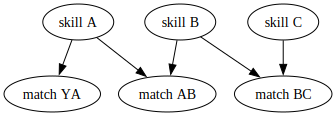

In [49]:
def model(n: int = 1):
    
    S_A = pyro.sample("skill A", dist.Normal(0, 1), sample_shape=(n,))
    S_B = pyro.sample("skill B", dist.Normal(0, 1), sample_shape=(n,))
    S_C = pyro.sample("skill C", dist.Normal(0,1), sample_shape=(n,))

    S_Y = 0.4
    
    p_AB = 1 / (1 + torch.exp(-2 * (S_A - S_B)))
    p_BC = 1 / (1 + torch.exp(-2 * (S_B - S_C)))
    p_YA = 1 / (1 + torch.exp(-2 * (S_Y - S_A)))
    
    Match_AB = pyro.sample("match AB", dist.Bernoulli(p_AB))
    Match_BC = pyro.sample("match BC", dist.Bernoulli(p_BC))
    Match_YA = pyro.sample("match YA", dist.Bernoulli(p_YA))

    return {'Match AB': Match_AB, 'Match_BC': Match_BC, 'Match_YA': Match_YA}

# 2: plot the corersponding graphical model
pyro.render_model(model)

In [50]:
samples = pd.DataFrame(model(30_000))
samples

,Match AB,Match_BC,Match_YA
0,0.0,1.0,0.0
1,1.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
29995,0.0,1.0,1.0
29996,1.0,0.0,1.0
29997,0.0,1.0,1.0
29998,0.0,1.0,1.0


In [55]:
print(f"P(Match_YA = 1 | Match_AB = 1 , Match_BC = 1) = {samples[(samples['Match AB'] == 1) & (samples['Match BC'] == 1)]['Match YA'].mean()}")


KeyError: 'Match BC'

### Exercise 4: Bayesian Inference on Carrier Status for Hemophilia

Hemophilia is caused by a **recessive gene** located on the **X-chromosome**. If $X^*$ denotes an X-chromosome carrying the hemophilia gene, then:
  - $X^*X^*$ represents a **female with the disease**.
  - $X^*X$ represents a **female without the disease but carrying the gene**.
  - $X^*Y$ represents a **male with the disease**.  

Mary has:  
- **An affected brother** ($X^*Y$),  
- **An unaffected mother** ($XX$ or $X^*X$),  
- **An unaffected father** ($XY$).  

Since Mary’s **brother is affected**, he must have inherited an $X^*$ from the **mother**, implying that the **mother is a carrier** ($X^*X$).  

Let $\theta$ be an indicator variable where:  
- $\theta = 1$ if Mary is a **gene carrier** ($X^*X$),  
- $\theta = 0$ if Mary is **not a carrier** ($XX$).  

Given the above information, before any additional observations, we assign the **prior probability**:

$$
P(\theta = 1) = \frac{1}{2}
$$


Mary has **two sons** (not identical twins, with unaffected father), both of whom are **not affected** by hemophilia.  

Let $y_i$ be an indicator variable where:  
- $y_i = 1$ if the $i$-th son is affected,  
- $y_i = 0$ if the $i$-th son is unaffected.  

Since males inherit their **X-chromosome from their mother**, if Mary is a carrier ($\theta = 1$), each son has a **50% chance** of being affected.  

The probability of both sons being unaffected (we denote this event, i.e. $y_1 = 0$ AND $y_2 = 0$, with $y=1$), given $\theta$, is:

$$
P(y = 1 \mid \theta) =
\begin{cases}  
0.25, & \text{if } \theta = 1 \\  
1, & \text{if } \theta = 0 
\end{cases}
$$

1) Calculate $P(y)$

2) Considering that both the sons are unaffected, calculate the posterior $P(\theta = 1 | y)$

3) What is the probability that a third son is affected? Calculate the predictive distribution

4) Suppose a third son is born and he is not affected, update the posterior by computing $P(\theta = 1 | y, y_3 = 0)$


### Exercise 5: Hierarchical model in Pyro

In this problem, we consider a hierarchical model that represents the distribution of test scores across multiple schools. Our goal is to define a generative model that captures both **global** and **school-specific** variations in scores.

- There are **N** schools, each having **M** students and a different average performance.
- The **global mean score** across all schools follows a normal prior.
 $$
   \mu_{\text{global}} \sim \mathcal{N}(0, 5)
   $$

- Each **school-specific mean** is derived from the global mean with a random offset: each school $i$ has a deviation from the global mean:

   $$
   \theta_i \sim \mathcal{N}(0, 1), \quad i = 1, \dots, N
   $$

   s.t.

   $$
   \mu_i = \mu_{\text{global}} + \theta_i
   $$
- **Individual student scores** are drawn from a normal distribution with their school's mean: each student $j$ in school $i$ receives a test score:

   $$
   y_{ij} \sim \mathcal{N}(\mu_i, 1), \quad j = 1, \dots, M
   $$

Generative model:

1) Sample the global mean
2) For each school, sample its offset and compute its mean.
3) For each student in each school, sample their test score
4) Plot one histogram for each school, showing the distribution of the student scores.

**NOTE: use the plate notation!**

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

import pyro
import pyro.distributions as dist

In [ ]:
# 1: Write the corresponding model in pyro
def model(n,m: int):

    global_mean = pyro.sample("global mean", dist.Normal(0, 5))
    print(f"Global mean: {global_mean}")
    
    fig, axes = plt.subplots(n, 1, figsize=(8, 4*n))  # Crea una figura con `n` sottotrame

    for i in range(n):
      specific_deviation = pyro.sample(f"specific deviation_{i}", dist.Normal(0, 1))
      specific_mean = global_mean + specific_deviation

      with pyro.plate(f'M students_{i}', m):
        individual_student_score = pyro.sample(f"individual student scores_{i}", dist.Normal(specific_mean, 1.))
      
      print(f"Specific mean_{i}: {specific_mean}")
      print(f"Specific deviation_{i}: {specific_deviation}")
      print(f"Individual student score_{i}: {individual_student_score}")

      sns.histplot(individual_student_score.numpy(), kde=True, stat='density', ax=axes[i])
      axes[i].set_title(f"Student Scores for School {i+1}")
    
        # with pyro.plate("M", m):
        #     # Broadcasting: mu[:, None] ha forma [N, 1] → broadcast su [N, M]
        #     individual_student_score = pyro.sample("individual student scores", dist.Normal(specific_mean[:, None], 1.))
    
    plt.tight_layout()  # Ottimizza la disposizione dei sottotitoli
    plt.show()
    
    return {'global mean': global_mean, 'specific deviation': specific_deviation, 'specific mean': specific_mean, 'individual student score':individual_student_score}

# 2: plot the corersponding graphical model
pyro.render_model(model, model_args=(20, 500), render_distributions=True)


### Exercise 6: Extending Belief Propagation to the Sum-Product Algorithm

In the notebook *"Exact Inference with Belief Propagation"*, we previously computed the marginal distribution of a given variable using the message-passing method. Now, we aim to extend this implementation to the sum-product algorithm.

1. **Extend the `Messages` class** by adding the following methods:  
   - **`forward`**: Computes the forward pass.  
   - **`backward`**: Computes the backward pass.  
   - **`belief_propagation`**: Executes the forward and backward passes, then uses the computed messages to determine all marginal distributions. This method should return a dictionary mapping each variable name to its corresponding marginal distribution.  

2. **Apply the `belief_propagation` method** to compute the marginal distributions of the variables in the factor graph described on page 43 of the course notes.  

For this exercise, please submit the updated notebook **`04_exact_inference.ipynb`**, including your additional code.

**NOTE: Make sure to add comments to all the code you write!**